Projeto final do curso de Técnicas de Programação da ADA TECH/BRAsken

In [ ]:
#instalnando o pandas
#!pip install pandas

In [ ]:
#carregando pandas e numpy
import pandas as pd
import numpy as np

In [ ]:
#carregando as bases de dados
deaths_df = pd.read_csv("/content/COVID DEATHS.csv")
vax_df = pd.read_csv("/content/COVID_VACCINATIONS.csv")

In [ ]:
#verificando se o carregamento ocorreu corretamente
deaths_df.shape

(302749, 26)

In [ ]:
#verificando se o carregamento ocorreu corretamente
vax_df.shape

(302749, 45)

In [ ]:
#procurando as colunas em comum
set(deaths_df.columns) & set(vax_df.columns)

{'continent', 'date', 'iso_code', 'location'}

In [ ]:
#criando o dataset
dataset = deaths_df.merge(vax_df, how="left", on=['continent', 'date', 'iso_code', 'location'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302749 entries, 0 to 302748
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   population                                  302749 non-null  int64  
 5   total_cases                                 266771 non-null  float64
 6   new_cases                                   294064 non-null  float64
 7   new_cases_smoothed                          292800 non-null  float64
 8   total_deaths                                246214 non-null  float64
 9   new_deaths                                  294139 non-null  float64
 

In [ ]:
#importando ferramenta de plotagem
import matplotlib.pyplot as plt

###Pergunta 1:
Os 10 paises com maior população tiveram maiores números, em proporção, de mortes por Covid-19?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "total_deaths_per_million": "max",
    "population": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)


,iso_code,location,total_deaths_per_million,population
0,ABW,Aruba,2695.874,106459
1,AFG,Afghanistan,191.691,41128772
2,AGO,Angola,54.343,35588996
3,AIA,Anguilla,755.810,15877
4,ALB,Albania,1267.979,2842318


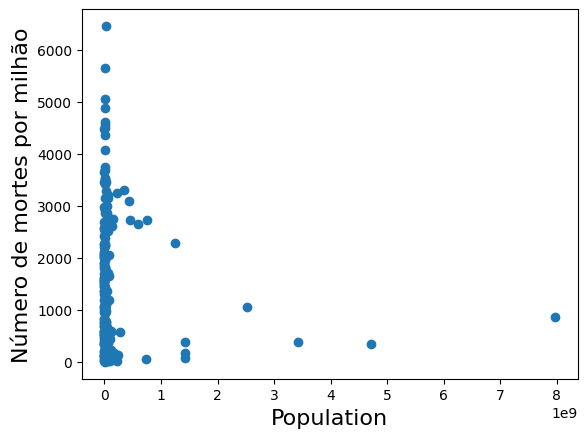

In [ ]:
plt.scatter(dataset_by_country_df['population'], dataset_by_country_df['total_deaths_per_million'])
plt.xlabel("Population", fontsize=16)
plt.ylabel("Número de mortes por milhão", fontsize=16)
plt.show()

RESPOSTA: Aparentemente, não se pode dizer que há uma correlação entre população e mortes, uma vez que países com população parecida têm número de mortes bem diferentes. Talvez, a população influencie, mas outros fatores precisariam ser levados também em consideração. Vale notar que a alta variação de número de habitantes por país dificulta a leitura do gráfico

###Pergunta 2:
Países com maior índice de rigidez nas restrições têm uma taxa de moratalidade menor?

In [ ]:

dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "total_deaths": "max",
    "stringency_index": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,total_deaths,stringency_index
0,ABW,Aruba,287.0,88.89
1,AFG,Afghanistan,7884.0,84.26
2,AGO,Angola,1934.0,90.74
4,ALB,Albania,3604.0,89.81
5,AND,Andorra,159.0,56.48


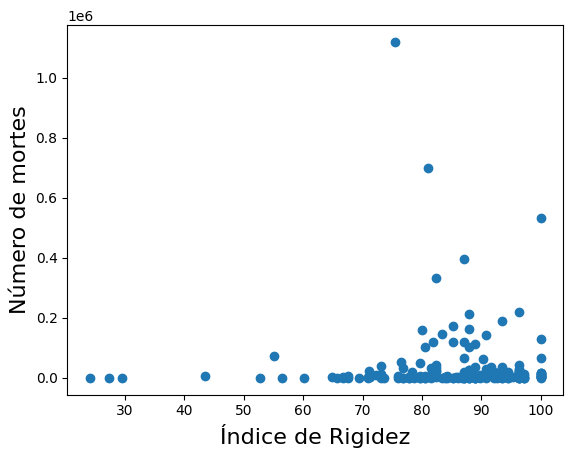

In [ ]:
plt.scatter(dataset_by_country_df['stringency_index'], dataset_by_country_df['total_deaths'])
plt.xlabel("Índice de Rigidez", fontsize=16)
plt.ylabel("Número de mortes", fontsize=16)
plt.show()

Resposta: Aparentemente, não é possível criar uma correlação entre os dados de restrição há mobilidade a as causas de morte. Talvez por estarmos lidando com duas variáveis que foram mudando com o tempo dentro de um mesmo pais. Vou plotar o dado sem agrupar por país para ver se faz algum sentido esta correlação

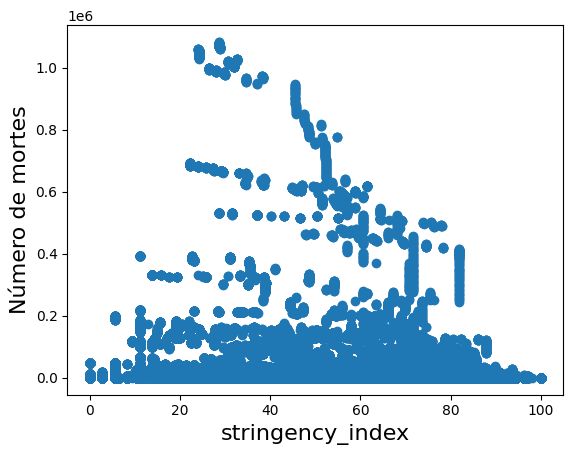

In [ ]:
dataset_sem_nulo = dataset.dropna(subset="stringency_index")
plt.scatter(dataset['stringency_index'], dataset['total_deaths'])
plt.xlabel("stringency_index", fontsize=16)
plt.ylabel("Número de mortes", fontsize=16)
plt.show()

Definitivamente, não é possível criar uma correlação entre estes dois índices sem levar em consideração outros dados.

###Pergunta 3:
Países que testaram mais pessoas tiveram menos casos positivos de Covid-19?

Nesta análise, vamos usar o teste por 1000 pessoas e os casos por milhão de pessoas para a análise fazer mais sentido, pois apenas o número absoluto não informa muita coisa, enquanto o percentual da população faz mais sentido

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "total_cases_per_million": "max",
    "total_tests_per_thousand": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,total_cases_per_million,total_tests_per_thousand
0,ABW,Aruba,414375.487,7.44
1,AFG,Afghanistan,5145.546,24.81
2,AGO,Angola,2960.269,46.91
3,AIA,Anguilla,245890.282,3261.73
4,ALB,Albania,117473.485,565.34


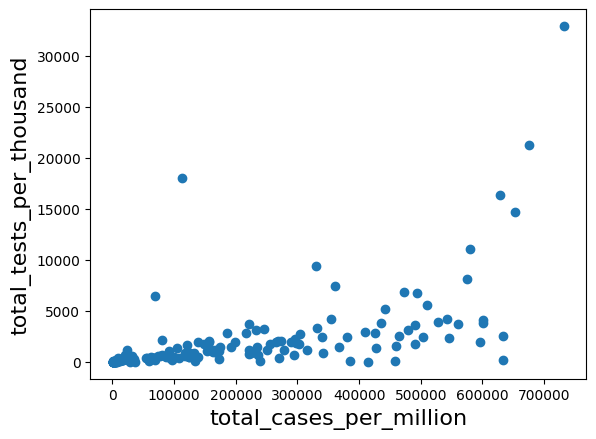

In [ ]:
plt.scatter( dataset_by_country_df['total_cases_per_million'], dataset_by_country_df['total_tests_per_thousand'])
plt.xlabel("total_cases_per_million", fontsize=16)
plt.ylabel("total_tests_per_thousand", fontsize=16)
plt.show()

Resposta: Estas variáveis parecem ter alguma conexão diretamente proporcional, ao invés da hipótese inicial, o que faz algum sentido. Mais testes tem maior detecção de casos

###Pergunta 4:
Uma comparação entre o total de vacinados e o total de doses de reforço aplicados?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "people_vaccinated_per_hundred": "max",
    "total_boosters_per_hundred": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,people_vaccinated_per_hundred,total_boosters_per_hundred
1,AFG,Afghanistan,35.53,2.55
2,AGO,Angola,43.81,5.39
3,AIA,Anguilla,68.36,20.84
4,ALB,Albania,47.39,13.91
5,AND,Andorra,72.52,53.93


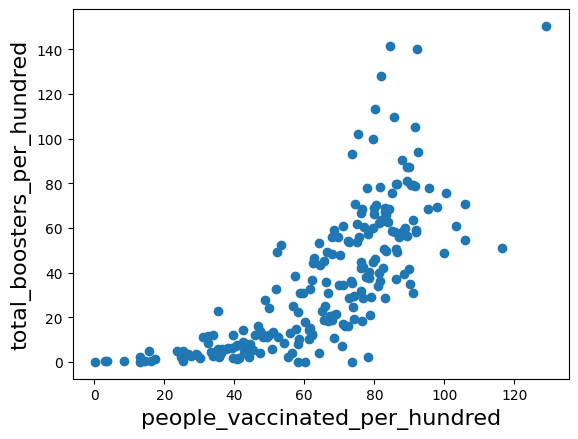

In [ ]:
plt.scatter(dataset_by_country_df['people_vaccinated_per_hundred'], dataset_by_country_df['total_boosters_per_hundred'])
plt.xlabel("people_vaccinated_per_hundred", fontsize=16)
plt.ylabel("total_boosters_per_hundred", fontsize=16)
plt.show()

Resposta: Estas variáveis parecem ter uma correlação exponencial. Países que tiveram mais pessoas vacinadas também tiveram maior número de pessoas tomando as doses de reforço

###Pergunta 5:
A quantidade de dados faltantes  quanto a mortes agrupados por continentes e países.

In [ ]:
#por pais
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location'])['total_deaths'].apply(lambda x: x.isna().sum()).reset_index(name='contagem_nulos')
dataset_by_country_df.head(5)

,iso_code,location,contagem_nulos
0,ABW,Aruba,109
1,AFG,Afghanistan,80
2,AGO,Angola,138
3,AIA,Anguilla,628
4,ALB,Albania,69


In [ ]:
#porcontinente
dataset_by_continent_df = dataset.groupby(by=['continent'])['total_deaths'].apply(lambda x: x.isna().sum()).reset_index(name='contagem_nulos_total_deaths')
dataset_by_continent_df

,continent,contagem_nulos_total_deaths
0,Africa,7989
1,Asia,11877
2,Europe,9999
3,North America,7653
4,Oceania,16207
5,South America,2264


###Pergunta 6:
A taxa de reprodução do vírus (reproduction_rate) é mais intensa em países mais populosos (population)?

In [ ]:
#achei que faria mais sentido usarmos a densidade populacional ao invés da população
#absoluta
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "reproduction_rate": "max",
    "population_density": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,reproduction_rate,population_density
1,AFG,Afghanistan,1.61,54.42
2,AGO,Angola,2.94,23.89
4,ALB,Albania,1.88,104.87
5,AND,Andorra,1.63,163.76
6,ARE,United Arab Emirates,2.70,112.44


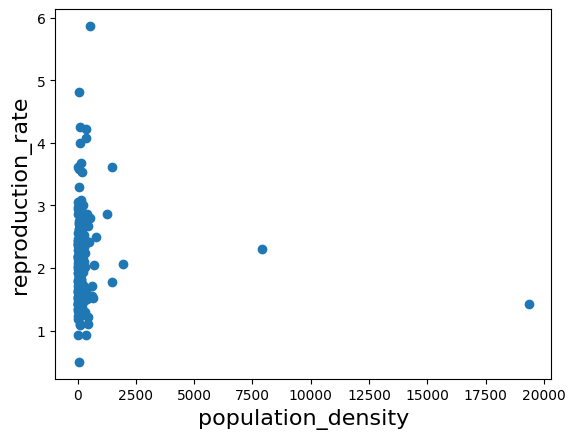

In [ ]:
plt.scatter(dataset_by_country_df['population_density'], dataset_by_country_df['reproduction_rate'])
plt.xlabel("population_density", fontsize=16)
plt.ylabel("reproduction_rate", fontsize=16)
plt.show()

Resposta:
Não parece haver coligação entre estes dados, talvez uma transformação nos dados (multiplicar a taxa de reprodução por 1000000, por exemplo) permita uma análise melhor

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "reproduction_rate": "max",
    "population_density": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df["reproduction_rate"] = dataset_by_country_df["reproduction_rate"].apply(lambda x: x*1000000)
dataset_by_country_df.head(5)

,iso_code,location,reproduction_rate,population_density
1,AFG,Afghanistan,1610000.0,54.42
2,AGO,Angola,2940000.0,23.89
4,ALB,Albania,1880000.0,104.87
5,AND,Andorra,1630000.0,163.76
6,ARE,United Arab Emirates,2700000.0,112.44


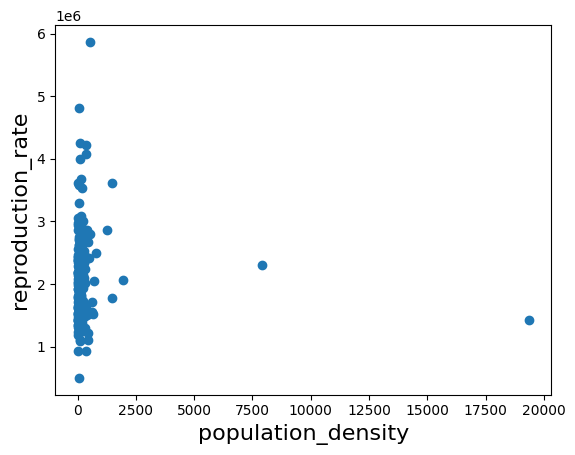

In [ ]:
plt.scatter(dataset_by_country_df['population_density'], dataset_by_country_df['reproduction_rate'])
plt.xlabel("population_density", fontsize=16)
plt.ylabel("reproduction_rate", fontsize=16)
plt.show()

Resposta: nada feito... parece que a variação alta do campo de densidade populacional dificulta muito uma análise

###Pergunta 7:
Qual a relação entre pacientes hospitalizados e quantidade de mortes?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "total_deaths": "max",
    "weekly_hosp_admissions": "max"
}).reset_index()
hospitalizacoes_totais = dataset.groupby(by=['iso_code', 'location'])['weekly_hosp_admissions'].sum().reset_index(name='hospitalizacoes_totais')
dataset_by_country_df = dataset_by_country_df.merge(hospitalizacoes_totais, on=['iso_code', 'location'])
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,total_deaths,weekly_hosp_admissions,hospitalizacoes_totais
15,BEL,Belgium,34115.0,4991.0,1083567.0
36,CHE,Switzerland,13981.0,1747.0,445027.0
37,CHL,Chile,64497.0,4486.0,1556270.0
51,CYP,Cyprus,1349.0,245.0,7689.0
52,CZE,Czechia,42702.0,7431.0,1935994.0


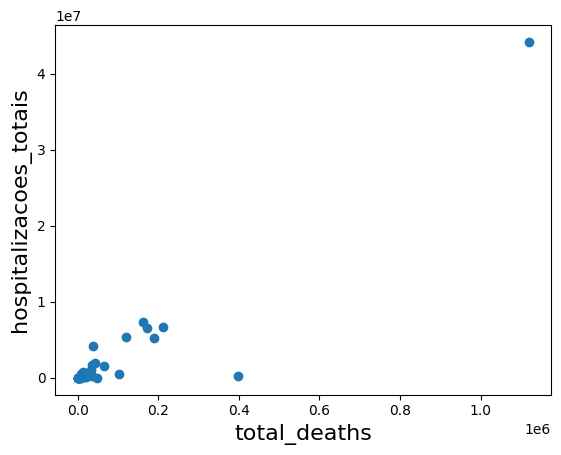

In [ ]:
plt.scatter(dataset_by_country_df['total_deaths'], dataset_by_country_df['hospitalizacoes_totais'])
plt.xlabel("total_deaths", fontsize=16)
plt.ylabel("hospitalizacoes_totais", fontsize=16)
plt.show()

Reposta: pode ser que tenha uma correlação, entre estes dados e esta correlação parece ser diretamente proporcional

###Pergunta 8:
Países com maior índice de rigidez nas medidas restritivas tendem a ter uma taxa de vacinação mais alta?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "people_vaccinated_per_hundred": "max",
    "stringency_index": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,location,people_vaccinated_per_hundred,stringency_index
0,ABW,Aruba,84.91,88.89
1,AFG,Afghanistan,35.53,84.26
2,AGO,Angola,43.81,90.74
4,ALB,Albania,47.39,89.81
5,AND,Andorra,72.52,56.48


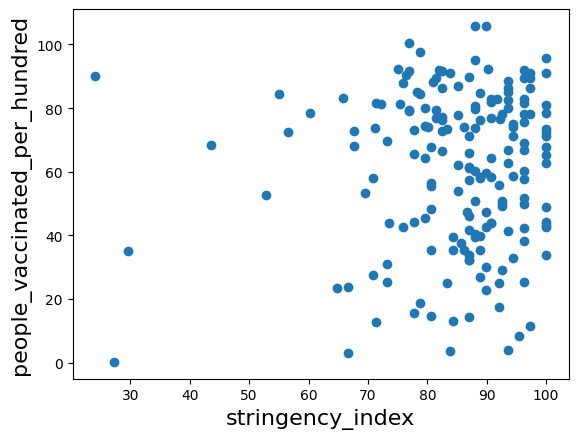

In [ ]:
plt.scatter(dataset_by_country_df['stringency_index'], dataset_by_country_df['people_vaccinated_per_hundred'])
plt.xlabel("stringency_index", fontsize=16)
plt.ylabel("people_vaccinated_per_hundred", fontsize=16)
plt.show()

Resposta: Estes dados não parecem ter correlação sozinhos

###Pergunta 9:
Qual é a proporção de pessoas vacinadas que foram hospitalizadas devido à COVID-19 em comparação com pessoas não vacinadas?

Resposta: Não temos estes dados.

###Pergunta 10:
Quais foram os 5 países com maior % de mortes em relação a sua população total?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'location']).agg({
    "total_deaths": "max",
    'population': "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df['death_rate'] = dataset_by_country_df['total_deaths'] / dataset_by_country_df['population']
dataset_by_country_df = dataset_by_country_df.sort_values(by='death_rate', ascending=False)
dataset_by_country_df.head(5)


,iso_code,location,total_deaths,population,death_rate
184,PER,Peru,219866.0,34049588,0.006457
20,BGR,Bulgaria,38282.0,6781955,0.005645
23,BIH,Bosnia and Herzegovina,16328.0,3233530,0.005050
94,HUN,Hungary,48719.0,9967304,0.004888
136,MKD,North Macedonia,9667.0,2093606,0.004617


Resposta: Peru, Bulgaria, Bosnia e Herzegovina, Hungaria e Macedonia do Norte

###Pergunta 11:
Qual a relação entre a quantidade de pacientes hospitalizados e quantos desses foram para a UTI?

Não conseguimos responder esta pergunta, pois os dados são de pessoas hospitalizadas em uma data dada, sendo assim, o dado não parece ser cumulativo e nada garante que as pessoas hospitalizadas em uma data não viraram um subset do grupo de pessoas hospitalizadas na data seguinte. Neste caso, corremos o risco de recontagem na agragação dos dados

###Pergunta 12:
Como as taxas de vacinação e mortalidade variam entre os diferentes continentes?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'continent', 'location']).agg({
    "people_vaccinated_per_hundred": "max",
    "total_deaths_per_million": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_continent_df = dataset.groupby(by=['continent']).agg({
    "people_vaccinated_per_hundred": "mean",
    "total_deaths_per_million": "mean"
}).reset_index()
dataset_by_continent_df

,continent,people_vaccinated_per_hundred,total_deaths_per_million
0,Africa,18.098334,198.930094
1,Asia,52.765941,429.502422
2,Europe,55.797113,1543.103382
3,North America,51.274251,871.200999
4,Oceania,52.628031,484.223744
5,South America,58.967139,1620.365115


Resposta: As médias das taxas por cem habitantes e medias das taxas de mortes por milhão de habitantes variam conforme mostrado acima

###Pergunta 13:
Os países com as maiores porcentagens de idosos tiveram as maiores taxas de mortalidade por COVID-19?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'continent', 'location']).agg({
    "median_age": "max",
    "total_deaths_per_million": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,continent,location,median_age,total_deaths_per_million
0,ABW,North America,Aruba,41.2,2695.874
1,AFG,Asia,Afghanistan,18.6,191.691
2,AGO,Africa,Angola,16.8,54.343
4,ALB,Europe,Albania,38.0,1267.979
6,ARE,Asia,United Arab Emirates,34.0,248.805


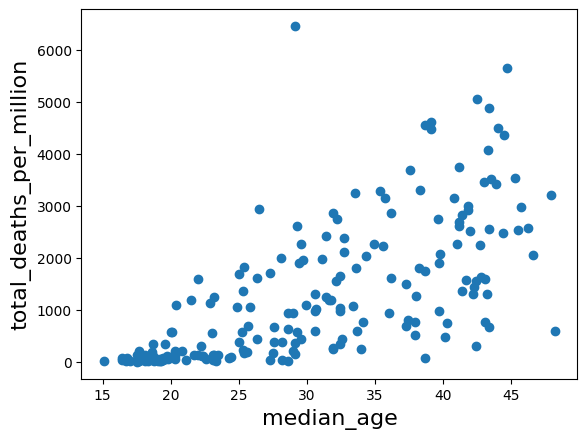

In [ ]:
plt.scatter(dataset_by_country_df['median_age'], dataset_by_country_df['total_deaths_per_million'])
plt.xlabel("median_age", fontsize=16)
plt.ylabel("total_deaths_per_million", fontsize=16)
plt.show()

Resposta: aparentemente, há alguma correlação entre idade e taxa de morte.

###Pergunta 14:
Os paises com maior populacao por area quadrada tiveram maior numero de incidencias, internações  ou mortes?

In [ ]:
dataset_by_country_df = dataset.groupby(by=['iso_code', 'continent', 'location']).agg({
    "population_density": "max",
    "total_cases": "max",
    "total_deaths": "max"
}).reset_index()
dataset_by_country_df = dataset_by_country_df.dropna()
dataset_by_country_df.head(5)

,iso_code,continent,location,population_density,total_cases,total_deaths
0,ABW,North America,Aruba,584.80,44114.0,287.0
1,AFG,Asia,Afghanistan,54.42,211630.0,7884.0
2,AGO,Africa,Angola,23.89,105353.0,1934.0
4,ALB,Europe,Albania,104.87,333897.0,3604.0
5,AND,Europe,Andorra,163.76,47939.0,159.0


DENSIDADE POPULACIONAL X CASOS TOTAIS

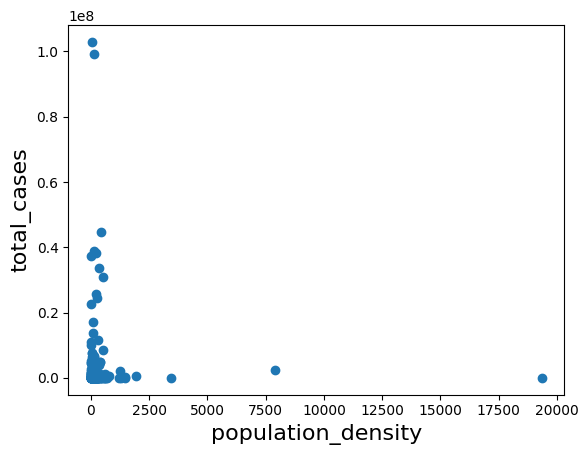

In [ ]:
plt.scatter(dataset_by_country_df['population_density'], dataset_by_country_df['total_cases'])
plt.xlabel("population_density", fontsize=16)
plt.ylabel("total_cases", fontsize=16)
plt.show()

DENSIDADE POPULACIONAL X MORTE

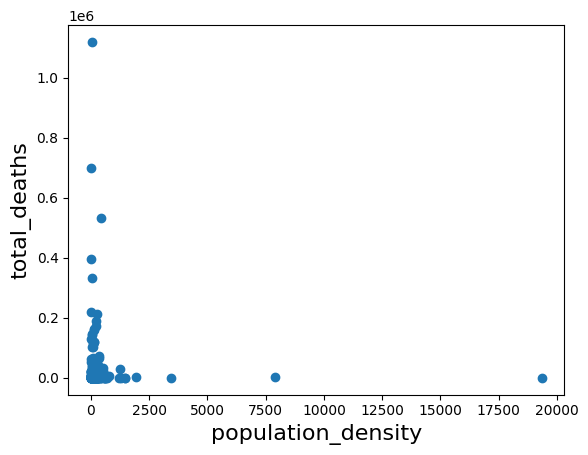

In [ ]:
plt.scatter(dataset_by_country_df['population_density'], dataset_by_country_df['total_deaths'])
plt.xlabel("population_density", fontsize=16)
plt.ylabel("total_deaths", fontsize=16)
plt.show()

DENSIDADE POPULACIONAL X HOSPITALIZAÇÕES

Neste caso, incorremos no mesmo problema do problema anterior com relação ás hospitalizações

Resposta final: como os dados de densidade populacional variam entre cerca de 3 e 23 mil, fica muito difícil tirar uma conclusão baseado no gráfico. Teríamos que manippular os dados de maneira a ter uma rsposta mais eficiente, talvez isolando os casos muito extremos de densidade populacional

###Pergunta 15:
Em qual data ocorreram mais mortes por covid mundialmente ?

In [ ]:
dataset_by_date_df = dataset.groupby(by=['date']).agg({
    "new_deaths": "sum"
}).reset_index()
dataset_by_date_df = dataset_by_country_df.dropna()
dataset_by_date_df = dataset_by_date_df.sort_values(by='new_deaths', ascending=False)
dataset_by_date_df.head(5)

,date,new_deaths
968,7/21/2021,80128.0
57,1/22/2021,68897.0
61,1/23/2021,67306.0
25,1/15/2021,66525.0
81,1/28/2021,66508.0


Resposta, a pior data foi o dia 21 de julho de 2021, onde tivemos 80128 perdas devido ao Covid.